In [434]:
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns; 
#sns.set()
from matplotlib import pyplot
from pandas import DataFrame
import numpy as np

In [435]:
#The following code will run the groupby and plot a nice time series graph.

import matplotlib.dates as mdates

def plot_gb_time_series(df, ts_name, gb_name, value_name, figsize=(20,7), title=None, filefig = None):
    '''
    Runs groupby on Pandas dataframe and produces a time series chart.

    Parameters:
    ----------
    df : Pandas dataframe
    ts_name : string
        The name of the df column that has the datetime timestamp x-axis values.
    gb_name : string
        The name of the df column to perform group-by.
    value_name : string
        The name of the df column for the y-axis.
    figsize : tuple of two integers
        Figure size of the resulting plot, e.g. (20, 7)
    title : string
        Optional title
    '''
    xtick_locator = mdates.DayLocator(interval=1)
    xtick_dateformatter = mdates.DateFormatter('/%Y-%m')
    fig, ax = plt.subplots(figsize=figsize)
    for key, grp in df.groupby([gb_name]):
        ax = grp.plot(ax=ax, kind='line', x=ts_name, y=value_name, label=key, marker='o')
    ax.xaxis.set_major_locator(xtick_locator)
    ax.xaxis.set_major_formatter(xtick_dateformatter)
    ax.autoscale_view()
    ax.legend(loc='upper right')
    _ = plt.xticks(rotation=90, )
    _ = plt.grid(True)
    _ = plt.xlabel(ts_name)
    _ = plt.ylim(0, df[value_name].max() * 1.25)
    _ = plt.ylabel(value_name)
    if title is not None:
        _ = plt.title(title)
    if filefig is not None:
        _ = plt.savefig(filefig)  
    _ = plt.show()
    

In [436]:
#importa dataset Dubai real estate
Filename = 'Transactions.csv'
df = pd.read_csv( Filename)

C:\Users\SAMSUNG\anaconda3\envs\stan_env\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [437]:
df.head()

,procedure_id,procedure_name_ar,procedure_name_en,instance_date,property_type_id,property_type_ar,property_type_en,area_name_ar,area_name_en,property_sub_type_ar,...,procedure_area,actual_worth,meter_sale_price,rent_value,meter_rent_price,building_name_ar,building_name_en,reg_type_id,reg_type_ar,reg_type_en
0,1,مبايعات,Sales,04-07-1998,1,ارض,Land,البرشاء,Al Barsha,تجارى,...,1393.55,690000.0,495.14,NaN,NaN,NaN,NaN,1,العقارات القائمة,Existing Properties
1,1,مبايعات,Sales,05-03-2000,1,ارض,Land,البرشاء,Al Barsha,تجارى,...,1393.55,450000.0,322.92,NaN,NaN,NaN,NaN,1,العقارات القائمة,Existing Properties
2,1,مبايعات,Sales,18-06-1998,1,ارض,Land,البرشاء,Al Barsha,تجارى,...,1393.55,620000.0,444.91,NaN,NaN,NaN,NaN,1,العقارات القائمة,Existing Properties
3,1,مبايعات,Sales,28-10-2001,1,ارض,Land,البرشاء,Al Barsha,تجارى,...,1393.55,375000.0,269.10,NaN,NaN,NaN,NaN,1,العقارات القائمة,Existing Properties
4,1,مبايعات,Sales,09-02-2000,1,ارض,Land,البرشاء,Al Barsha,تجارى,...,1393.55,100000.0,71.76,NaN,NaN,NaN,NaN,1,العقارات القائمة,Existing Properties


In [438]:
#Convert string into date for the group by

df['year_month'] = df['instance_date'].str.slice(6, 10) +"-"+ df['instance_date'].str.slice(3, 5)
df['year'] = df['instance_date'].str.slice(6, 10)

df['instance_date'] = pd.to_datetime(df['instance_date'], format='%d-%m-%Y') #convert string to datetime


In [439]:
#Filtro outlier and record non rilevanti
StartDt = '2014-01-01'
Area_Name ='Marsa Dubai'
#Buiding_Name = 'Shams 1'
dffilter = df.loc[(df['year_month']>StartDt) 
                  & (df['procedure_name_en'] != 'Gifts') 
                  & (df['property_type_en'] == 'Unit') 
                  & (df['property_sub_type_en'] == 'Residential')
                  & (df['area_name_en'] == Area_Name)
#                  & (df['building_name_en'] == Buiding_Name)
                  & (df['reg_type_en']=='Existing Properties')
                  & (df['meter_sale_price'] <20000) #remove outlier on meter_sale_price
                  & (df['procedure_area'] <200)
                  & (df['procedure_area'] >100)
                 ]

Title_graph ='Area: '+ Area_Name + ' Building: ' 

if len(Buiding_Name) > 0:
    Title_graph = Title_graph   + Buiding_Name
else:
    Title_graph = Title_graph   + ' all'
    
print(Title_graph)
dffilter["building_name_en"].value_counts()



Area: Marsa Dubai Building: Shams 1


Torch Tower                253
PRINCESS TOWER             241
Bahar 1                    231
Marina Pinnacle            227
Murjan 1                   215
                          ... 
EMIRATES CROWN TOWER         1
Bluewaters Residences 9      1
MARINA DIAMOND - A           1
Horizon Tower                1
Bluewaters Residences 4      1
Name: building_name_en, Length: 148, dtype: int64

In [440]:
dffilter.describe()

,procedure_id,property_type_id,procedure_area,actual_worth,meter_sale_price,rent_value,meter_rent_price,reg_type_id
count,8179.000000,8179.0,8179.000000,8.179000e+03,8179.000000,2.690000e+02,269.000000,8179.0
mean,1.393569,3.0,139.201792,1.687086e+06,12172.938261,1.465846e+06,10599.907844,1.0
std,0.488571,0.0,25.363607,6.007147e+05,3814.101150,5.272294e+05,3294.043300,0.0
min,1.000000,3.0,100.060000,3.568000e+04,322.750000,5.157349e+04,361.640000,1.0
25%,1.000000,3.0,119.480000,1.250000e+06,9305.690000,1.095000e+06,8484.380000,1.0
50%,1.000000,3.0,132.380000,1.643400e+06,12129.380000,1.387500e+06,10283.830000,1.0
75%,2.000000,3.0,159.250000,2.078650e+06,14984.115000,1.800000e+06,12695.240000,1.0
max,2.000000,3.0,199.960000,3.875000e+06,19989.340000,3.010000e+06,19058.650000,1.0


In [441]:
#find the row with highest value
dffilter.loc[dffilter['meter_sale_price'].idxmax()]

procedure_id                              1
procedure_name_ar                   مبايعات
procedure_name_en                     Sales
instance_date           2014-11-25 00:00:00
property_type_id                          3
property_type_ar                       وحدة
property_type_en                       Unit
area_name_ar                       مرسى دبي
area_name_en                    Marsa Dubai
property_sub_type_ar                   سكنى
property_sub_type_en            Residential
procedure_area                       112.56
actual_worth                       2.25e+06
meter_sale_price                    19989.3
rent_value                              NaN
meter_rent_price                        NaN
building_name_ar                    الصدف 7
building_name_en                    Sadaf 7
reg_type_id                               1
reg_type_ar                العقارات القائمة
reg_type_en             Existing Properties
year_month                          2014-11
year                            

In [442]:
#overall Dubai year trend on the average sale price so I goup by day and building
data = dffilter.groupby(['instance_date' ]).agg(mean_meter_price=('meter_sale_price', 'mean'))
data.describe()

,mean_meter_price
count,1567.000000
mean,11980.853232
std,2411.359911
min,1875.905000
25%,10465.804583
50%,12065.035000
75%,13501.825167
max,19988.680000


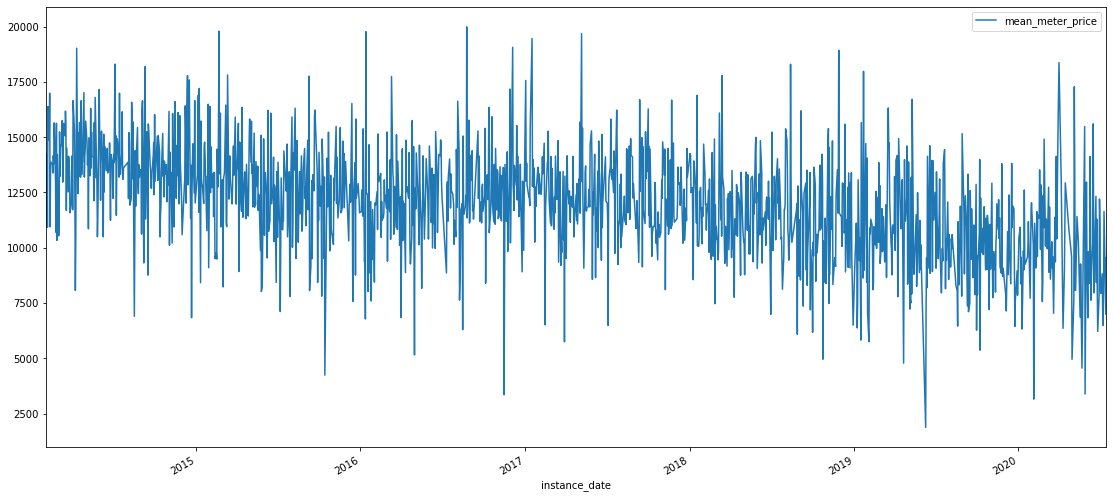

In [443]:
data.plot(figsize=(19,9))

In [444]:
data.resample('W').mean()

,mean_meter_price
instance_date,
2014-02-02,14202.077143
2014-02-09,13524.368867
2014-02-16,13873.732273
2014-02-23,14000.899651
2014-03-02,12284.129190
...,...
2020-06-21,11091.192500
2020-06-28,8360.192000
2020-07-05,9620.214000


# Resampling 

Let’s begin with simple resampling techniques. Resampling involves changing the frequency of your time series observations. One reason why you may be interested in resampling your time series data is feature engineering. Indeed, it can be used to provide additional structure or insight into the learning problem for supervised learning models. The resample method in pandas is similar to its groupby method as you are essentially grouping by a certain time span. You then specify a method of how you would like to resample. Let’s make resampling more concrete by looking at some examples. We’ll start with a weekly summary and:
data.resample() will be used to resample the kWh column of our DataFrame
The ‘W’ indicates we want to resample by week.
sum() is used to indicate we want the sum kWh during this period.

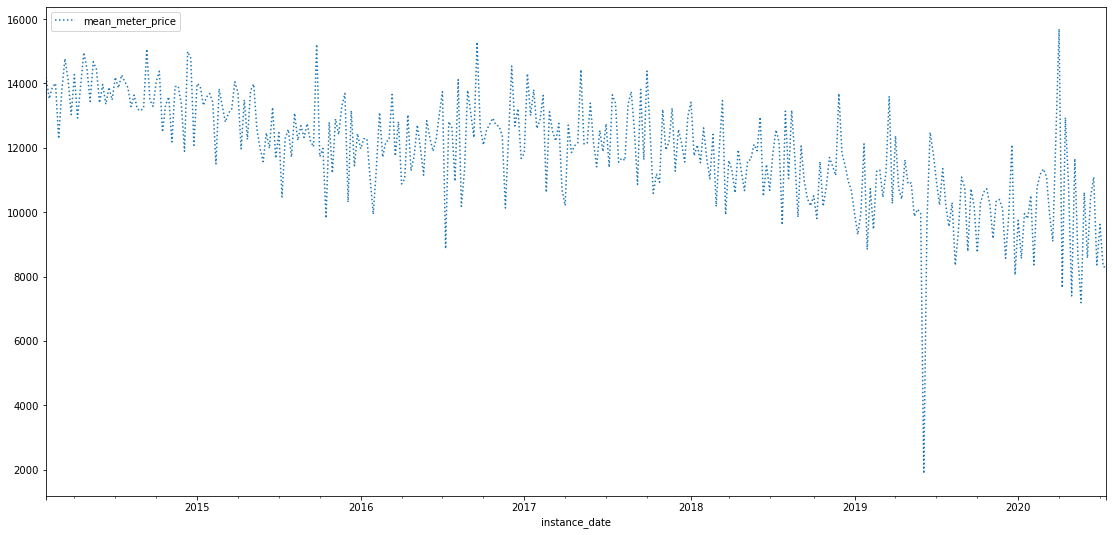

In [445]:
# you need to execute this comand  otherwise you get error
# pd.plotting.register_matplotlib_converters()

weekly = data.resample('W').mean()
weekly.plot(figsize=(19,9),style=[':','--','-'])

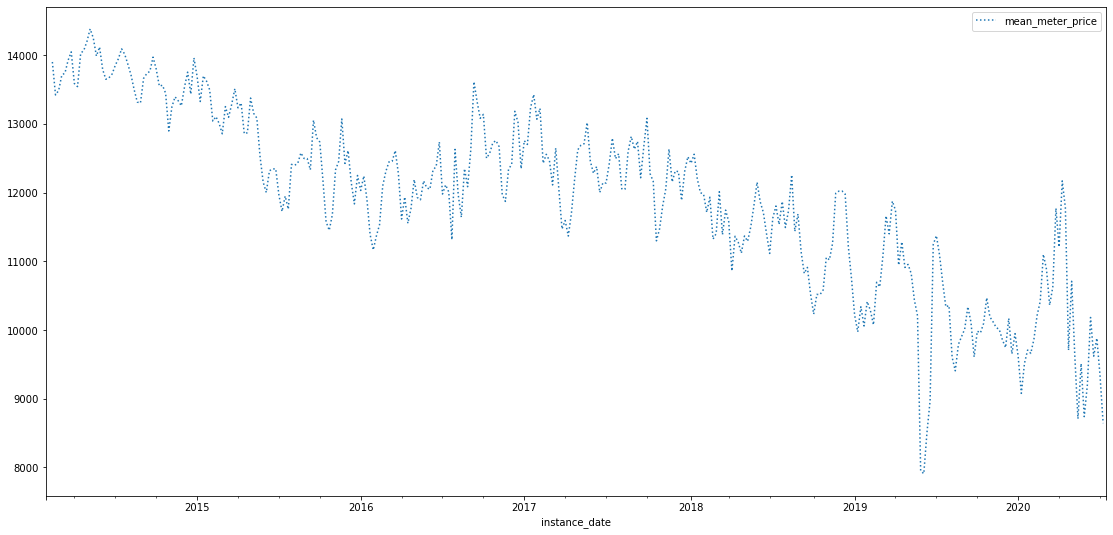

In [446]:
daily = data.resample('W').mean()
# rolling window 4 weeks
daily.rolling(4,center=True).mean().plot(figsize=(19,9),style=[':','--','-'])

# Forecast using Prophet

In [447]:
#import pystan
#model_code = 'parameters {real y;} model {y ~ normal(0,1);}'
#model = pystan.StanModel(model_code=model_code)
#y = model.sampling().extract()['y']
#y.mean()  # with luck the result will be near 0

https://towardsdatascience.com/playing-with-time-series-data-in-python-959e2485bff8

In [448]:
data = data.reset_index()
data = data.rename(columns={'instance_date':'ds','mean_meter_price':'y'})
#data = data.set_index('ds')
data.tail()

,ds,y
1562,2020-07-08,8048.900000
1563,2020-07-09,11642.575000
1564,2020-07-12,8289.211111
1565,2020-07-13,6998.377500
1566,2020-07-14,9553.577143


In [449]:
import fbprophet
df2_prophet = fbprophet.Prophet(changepoint_prior_scale=0.10,yearly_seasonality=True)
df2_prophet.fit(data)




INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [450]:
#make future dataframe
df2_forecast = df2_prophet.make_future_dataframe(periods=30*2, freq = 'D')
#make prediction
df2_forecast = df2_prophet.predict(df2_forecast)

Text(0.5, 1.0, 'Area: Marsa Dubai Building: Shams 1')

<Figure size 1440x1440 with 0 Axes>

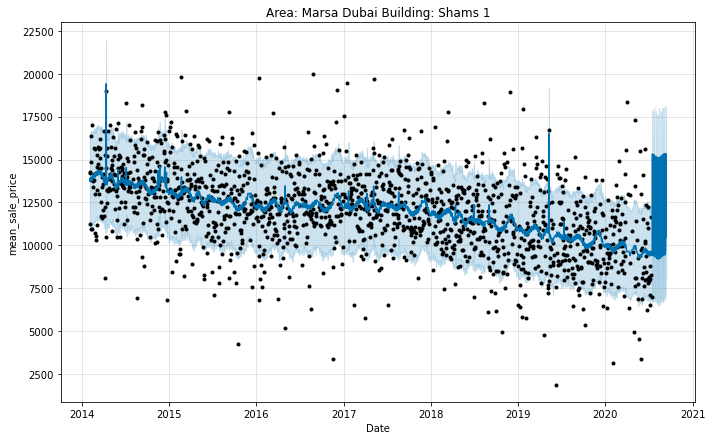

In [451]:
plt.figure(figsize=(20,20))
df2_prophet.plot(df2_forecast,xlabel = 'Date', ylabel = 'mean_sale_price')
plt.title(Title_graph)

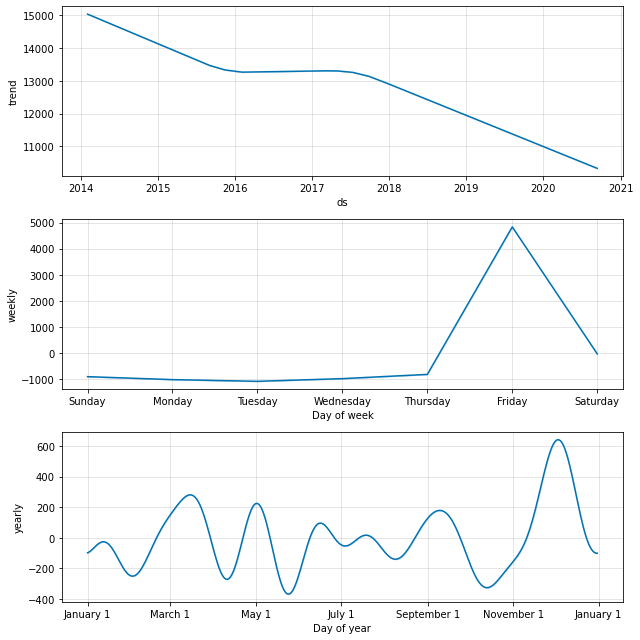

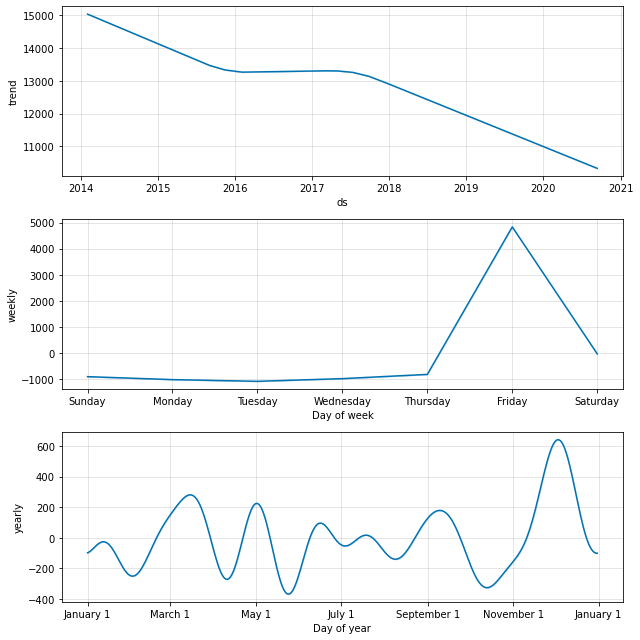

In [452]:
#plot the trend and patterns
df2_prophet.plot_components(df2_forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


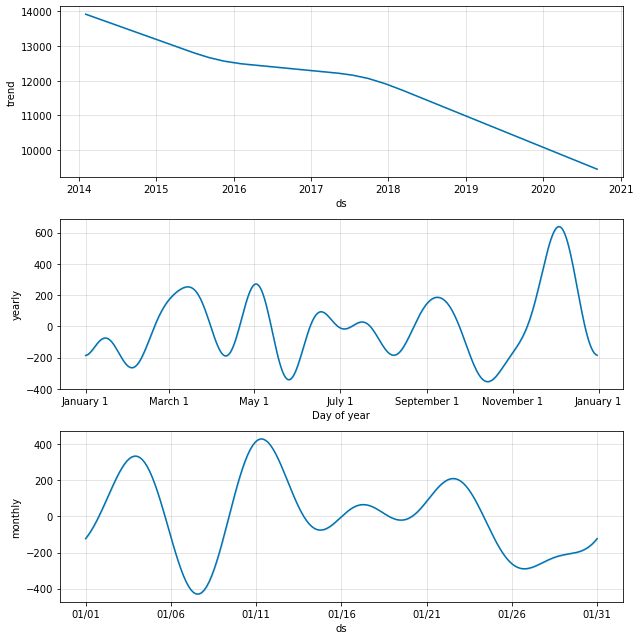

In [453]:
# Python
m = fbprophet.Prophet(weekly_seasonality=False)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
forecast = m.fit(data).predict(df2_forecast)
fig = m.plot_components(forecast)

# LSTM Prediction


In [505]:
#use summary daily data
data = data.reset_index()
data = data.rename(columns={'ds':'instance_date','y':'mean_meter_price'})
data = data.set_index('instance_date')
#data.drop([columns='index'])
#data = data.drop(columns=['index'])
data.head()

,mean_meter_price
instance_date,
2014-02-02,14202.077143
2014-02-03,11211.982000
2014-02-04,14248.073333
2014-02-05,10924.122000
2014-02-06,16386.002000


In [485]:
#LSTMs are sensitive to the scale of the input data, specifically when the sigmoid or tanh activation functions are used. 
#It’s generally a good practice to rescale the data to the range of [0, 1] or [-1, 1], also called normalizing. 
#We can easily normalize the dataset using the MinMaxScaler preprocessing class from the scikit-learn library.
from sklearn.preprocessing import MinMaxScaler
values = data['mean_meter_price'].values.reshape(-1,1)
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)

array([[0.68052363],
       [0.51544154],
       [0.68306303],
       ...,
       [0.3540764 ],
       [0.2828099 ],
       [0.4238816 ]], dtype=float32)

Now we can split the ordered dataset into train and test datasets. The code below calculates the index of the split point and separates the data into the training datasets with 80% of the observations that we can use to train our model, leaving the remaining 20% for testing the model.




In [477]:
train_size = int(len(scaled) * 0.8)
test_size = len(scaled) - train_size
train, test = scaled[0:train_size,:], scaled[train_size:len(scaled),:]
print (len(scaled), len(train), len(test))

1567 1253 314


In [520]:
def create_dataset(dataset,look_back=1):
    dataX, dataY = [],[]
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(dataset[i+look_back,0])
#    print(len(dataY))
    return np.array(dataX),np.array(dataY)

In [523]:
look_back = 2
trainX, trainY = create_dataset(train,look_back)
testX, testY = create_dataset(test,look_back)
print (trainX.shape, trainY.shape, testX.shape, testY.shape)

(1251, 2) (1251,) (312, 2) (312,)


In [517]:
testX.shape

(312, 2)

In [526]:
np.reshape(trainX, (trainX.shape[0],trainX.shape[1],1))

array([[[0.68052363],
        [0.51544154]],

       [[0.51544154],
        [0.68306303]],

       [[0.68306303],
        [0.49954885]],

       ...,

       [[0.6042982 ],
        [0.4094224 ]],

       [[0.4094224 ],
        [0.46707338]],

       [[0.46707338],
        [0.54621667]]], dtype=float32)

The LSTM network expects the input data to be provided with a specific array structure in the form of: [samples, time steps, features].
Our data is currently in the form [samples, features] and we are framing the problem as two time steps for each sample. We can transform the prepared train and test input data into the expected structure as follows:

In [528]:
trainX = np.reshape(trainX, (trainX.shape[0],trainX.shape[1],1))
testX = np.reshape(testX, (testX.shape[0],testX.shape[1],1))
                   

In [560]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model = Sequential()
model.add(LSTM(100,input_shape=(trainX.shape[1],trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
history = model.fit(trainX,trainY,epochs=1, batch_size=1, validation_data=(testX,testY),verbose=1,shuffle=False)

Train on 1251 samples, validate on 312 samples
1251/1251 [==============================] - 9s 7ms/sample - loss: 0.0200 - val_loss: 0.0180


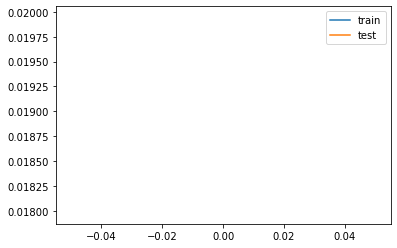

In [561]:
#plot the loss
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [563]:
#Now get the predicted values from the model using the test data.
#Getting the models predicted price values
predictions = model.predict(testX) 
#predictions = scaler.inverse_transform(predictions)#Undo scaling

In [564]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- testY)**2)))
rmse

0.13489163

In [576]:
#data[train_size:].shape
predictions = scaler.inverse_transform(predictions)#Undo scaling
predictions.shape

(312, 1)

In [581]:
#Plot/Create the data for the graph
train = data.iloc[:train_size]
valid = data.iloc[train_size+look_back:]
valid['Predictions'] = predictions


C:\Users\SAMSUNG\anaconda3\envs\stan_env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


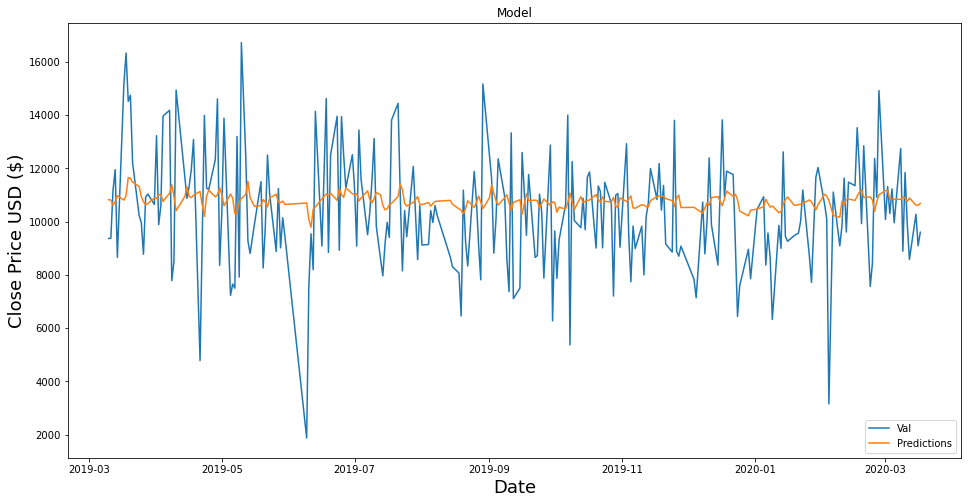

In [578]:
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
#plt.plot(train['Close'][:200])
plt.plot(valid[['mean_meter_price', 'Predictions']][:250])
plt.legend(['Val', 'Predictions'], loc='lower right')
plt.show()


# Creo una pivot table

In [ ]:
#Creo una pivot table
dfpivot = dfgb.pivot(index='instance_date',columns='building_name_en', values='mean_meter_price')


In [ ]:
# When you use the .plot() from DataFrame object, the X axis will automatically be the DataFrame's index.
# so I set date as index

#dfpivot.set_index('instance_date', inplace=True, drop=True) 
dfpivot['Year'] = dfpivot.index.year
dfpivot['Month'] = dfpivot.index.month
dfpivot.head()

In [ ]:
#get basic statistics
dfpivot.describe()

In [ ]:
dfpivot.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(dfpivot[keep_list], figsize=(20, 20))

In [ ]:
corr_matrix = dfpivot.corr()
corr_matrix["MAG218"].sort_values(ascending = False)

In [ ]:
#seems torch and mag218 are correlated - let's zoom in  
dfpivot.plot(kind="scatter", x="MAG218", y="Torch Tower",alpha=0.5,figsize=(20, 20))

In [ ]:
#Visualize the average price history
#1. Time Series Line Plot
#dfgb[['instance_date',('meter_sale_price', 'mean')]].plot('instance_date', figsize=(15,8))


dfpivot.plot(figsize=(18,9))
plt.show()

In [ ]:
# changing the style of the plot
color_dict = {'red zero line': '#FF0000', 'blue one line': '#0000FF'}
dfpivot.plot(color=[color_dict.get(x, '#333333') for x in dfpivot.columns])

dfpivot.plot(style='k.',figsize=(18,9),alpha=0.5)
pyplot.show()

It can be helpful to compare line plots for the same interval, such as from day-to-day, month-to-month, and year-to-year.

The Minimum Daily Temperatures dataset spans 10 years. We can group data by year and create a line plot for each year for direct comparison.

The example below shows how to do this.

The groups are then enumerated and the observations for each year are stored as columns in a new DataFrame.

Finally, a plot of this contrived DataFrame is created with each column visualized as a subplot with legends removed to cut back on the clutter.

In [ ]:
# https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html

# Add columns with year, month, and weekday name

#dfgb['Weekday Name'] = dfgb.index.weekday_name
# Display a random sampling of 5 rows
dfpivot.sample(5, random_state=0)



In [ ]:
axes = dfpivot[keep_list].plot(marker='.', alpha=0.5, linestyle='None', figsize=(19,19), subplots=True)
for ax in axes:
    ax.set_ylabel('mean_meter_price')

In [ ]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(19,19))
ax.plot(dfpivot.loc['2016-01':'2020-07', 'PRINCESS TOWER'], marker='o', linestyle=None)
ax.set_ylabel('mean_meter_price')
ax.set_title('Jan-Feb 2017 mean_meter_price')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));


In [ ]:
# https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/ 

fig, axes = plt.subplots(10, 1, figsize=(11, 10), sharex=True)
for name, ax in zip([keep_list], axes):
    print (name )
    sns.boxplot(data=dfpivot.iloc[:,0:11], x='Year', y=name)
ax.set_ylabel('GWh')
ax.set_title(name)


In [ ]:
for name, group in groups:
    years[name.year] = group.values
years.plot(subplots=True, legend=False)
pyplot.show()

In [ ]:
dfgb.head()

In [ ]:
dfgb.hist(figsize=(18,9),bins=100)

In [ ]:
# density plot
dfgb.plot(kind='kde')
pyplot.show()

In [ ]:
#voglio fare una group by area per analizzare andamento delle aree in dubai negli ultimi anni
#dfgb=df.groupby([(df.index.year),(df.index.month)]).count()

dfgb = df.groupby(["year","area_name_en","building_name_en" ]).agg(['mean', 'count', 'sum'])

dfgb = dfgb.reset_index()

dfgb.head()

In [ ]:
dfgb.info()

In [ ]:

houses = dfgb[[('year',''),('area_name_en',''),('procedure_id', 'count')]]
houses.plot.scatter(x='year', y='area_name_en', s=dfgb[('procedure_id', 'count')], figsize=(20,30))

houses.info()

In [ ]:
import seaborn as sns; 
sns.set()
heatmap1_data = pd.pivot_table(houses.loc[(houses['year']>'2005')], values=[('procedure_id', 'count')], 
                     index='area_name_en', 
                     columns='year',
                     fill_value=0,     #fill NaN value with zero
                     aggfunc='sum')    #default aggregation function in pivot is mean that return float so use sum
plt.figure(figsize=(15, 20))
sns.heatmap(heatmap1_data, annot=True, fmt="d" )
#heatmap1_data.info()
#heatmap1_data.head()



In [ ]:
df.columns

In [ ]:
#select marina from 2010 onwards

#df.loc[(df['Date'] >= StartDt) & (df['Date'] <= EndDt)]

StartDt = '2019-08'
EndDt = '2020-12-31'

dffilter = df.loc[(df['year_month']>StartDt) 
                  & (df['area_name_en'] == 'Marsa Dubai') 
                  & (df['procedure_name_en'] != 'Gifts') 
                  & (df['property_type_en'] == 'Unit') 
                  & (df['meter_sale_price'] <80000) #remove outlier on meter_sale_price
                  & (df['procedure_area'] <100000)
                 ]


In [ ]:
dffilter["building_name_en"].value_counts()

In [ ]:
#filtro i buildings che anno transato meno di 50 unita' nel periodo

col = 'building_name_en'   # name of the column that you consider
n = 20                # how many occurrences expected to be appeared

dffilter = dffilter[dffilter.groupby(col)[col].transform('count').ge(n)]

In [ ]:
dffilter["building_name_en"].value_counts()

In [ ]:
#voglio fare una group by building per analizzare andamento mensile dei bulding piu' hot negli ultimi anni
#dfgb=df.groupby([(df.index.year),(df.index.month)]).count()

dfgb = dffilter.groupby(["year_month","building_name_en" ]).agg(['mean', 'count', 'sum'])
dfgb = dfgb.reset_index()
dfgb.head()


In [ ]:
dfgb.describe()

In [ ]:
#scatter[plot
houses = dfgb[[('year_month',''),('building_name_en',''),('procedure_id', 'count')]]
houses.plot.scatter(x='year_month', y='building_name_en', s=houses[('procedure_id', 'count')], figsize=(20,20))

#houses.info()

In [ ]:
heatmap1_data = pd.pivot_table(houses , values=[('procedure_id', 'count')], 
                     index='building_name_en', 
                     columns='year_month',
                     fill_value=0,     #fill NaN value with zero
                     aggfunc='sum')    #default aggregation function in pivot is mean that return float so use sum
plt.figure(figsize=(15, 20))
sns.heatmap(heatmap1_data, annot=True, fmt="d" )
#heatmap1_data.info()
#heatmap1_data.head()

In [ ]:
dfgb.columns

In [ ]:
plot_gb_time_series(dfgb, ('year_month'), ('building_name_en'),  ('meter_sale_price',  'mean'),
                    figsize=(18,18), title="Average Meter Sale Price by Building")

In [ ]:
#dffilter.quantile([0.05,0.25,0.5,0.75,1])

In [ ]:
#Eliminating the rows of df where df.actual_worth is above 95 percentile:


dffilter = dffilter[dffilter.actual_worth < dffilter.actual_worth.quantile(.95)]
dffilter.plot.scatter(x='instance_date',y='actual_worth',figsize=(18,9))

In [ ]:
#dffilter.plot(kind='scatter',c ='meter_sale_price', x='instance_date',y='actual_worth', figsize=(18,9))
dffilter.plot(kind='scatter', x='instance_date',c='procedure_area', y='meter_sale_price', alpha=0.8, figsize=(18,9))



In [ ]:
dffilter.plot(kind="scatter", x="instance_date", y="meter_sale_price", alpha=0.4,
    c="meter_sale_price", s=dffilter["procedure_area"], label="population", figsize=(18,9)
    , cmap=plt.get_cmap("jet"), colorbar=True)


In [ ]:
StartDt = '2019-01-01'
EndDt = '2020-12-31'

dffilter_month = dffilter.loc[(dffilter[('instance_date')] >= StartDt) & (dffilter[('instance_date')] <= EndDt)]

dffilter_month.head()

plot_gb_time_series(dffilter_month, ('instance_date'), ('building_name_en'), ('meter_sale_price'),
                    figsize=(18, 9), title="Average Meter Sale Price by Building")